# Yelp API Project!
Created by Aaron Codrington and Diego Riverbay


# Intro:

 
Picture this. You're hungry, famished, literally starving. You need food and not just any food you need it fast. So you go to a fast food place and surprise, instead of the delicious food you hoped for it's bad...terrible..honestly a waste of your money. We've all been there and it doesn't feel too good. Terrible fast food experiences like this served as an inspiration for us to utilize the Yelp Fusion API in order to find the highest rated food places in our area. But then I realized why stop there, why stop at just finding good places near me. What happens when I travel or want to go somewhere new? From this thought we came up with the question "Which cities have the highest average rating for fast food." 


# Methodology:
Once we decided on a feasible question we needed to find a way to visually model said question. In order to generate a visual model we first needed data. In order to get data we used the Yelp Fusion API. This API allows us to gather data about businesses based on a set of parameters. In order to first reach the data we needed to create a function that would request data from the Yelp API, interpret it, then create a csv file containing the specific subset of data we needed.


In [ ]:
import requests
from api_setup import API_KEY
import numpy as np

API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
ENDPOINT = "https://api.yelp.com/v3/businesses/search"
API_AUTH = {'Authorization': 'bearer %s' % API_KEY}

PARAMETERS = {'location':'San Francisco',
                'limit':10,#limits to 10 searches
                'radius':1000,
                'term':'Fast Food'}#optional term like coffee

The search parameters we decided to use are "limit" which limits the amount of data we call from the API, "Radius" which is the area around the location point, "term" which is an optional refining parameter that allows us to search businesses that only serve a specific thing like "fast food" for example, and lastly "location" is just the general location of businesses.

Once we specified what data we should be getting we needed to request said data. the code segment below allows us to request data using the Yelp API.

In [ ]:
response = requests.get(url=ENDPOINT, 
                        params=PARAMETERS, 
                        headers=API_AUTH)

#need this line to convert out of j form
yelp_data = response.json()

The requested data returns in the form of a json file. the line "yelp_data = response.json()" converts the json data we received into a readable form which can be printed out and read. This data is  stored under the name yelp_data. We then define buisness_list and rating_list as blank lists in order to append the readable data in yelp_data to them. Next we search all the data in yelp_data for the category "businesses" and then the sub categories name, and rating.

In [ ]:
business_list = []
rating_list = []

for rate in yelp_data['businesses']:
    business_list.append(rate['name'])
    rating_list.append(rate['rating'])

print(business_list) #sanity checking
print(rating_list) #sanity checking

#saving data to csv file
#this way saves data to data storage/stored_data
np.savetxt('data_storage/single_stored_data.csv', \
    list(zip(business_list, rating_list)), delimiter=',', fmt='%s')

The last line of the function saves the data as a .csv file labeled single_stored_data.csv inside the data_storage folder. This data can then be read using the basic_graph_data function we created. This first function was the basis for all of our other functions and served as the base code which we can continuously improve upon in order to better suit what data we needed to find. From this original base code, the functions single_use_rating_search, multi_use_rating_search, and expanded_search were built. These functions all worked off the basis of requesting data from the API based upon parameters and storing the data.

Once we had our stored data we then created graphing functions in order to graph the data we had saved to csv files. 


# Results:



Our first graph was obtained by using the basic_graph_data function and the "data_storage/single_stored_data.csv" file. The graph created is a representation of the ratings of multiple Fast food places in Boston. It was quite surprising to see that 50% of the buisnesses we pulled using the API all had scores of 4.0.

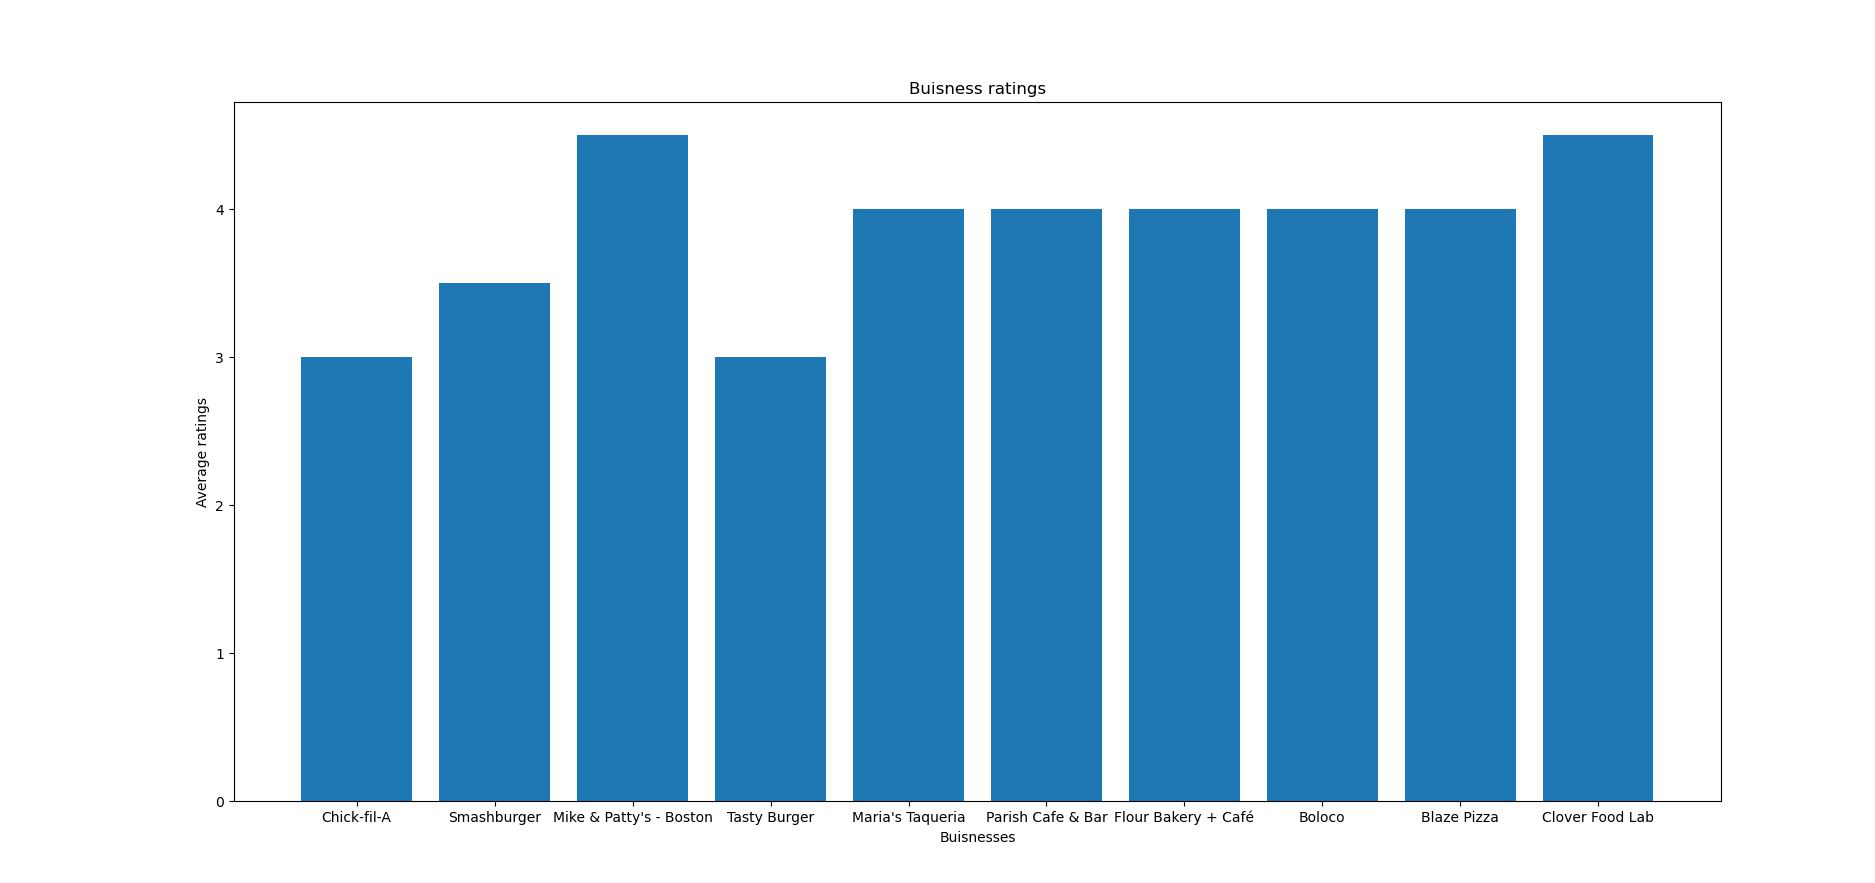

In [39]:
#run this to display graph
from PIL import Image
im = Image.open(r"visuals/avg buiz ratings.JPG") 
im.show() 

While this result is great we wanted the average data of multiple cities so we decided to create a new function called avg_finder. This was the most complex of the graphing functions, and it was designed to average the rating data of multiple inputted locations.

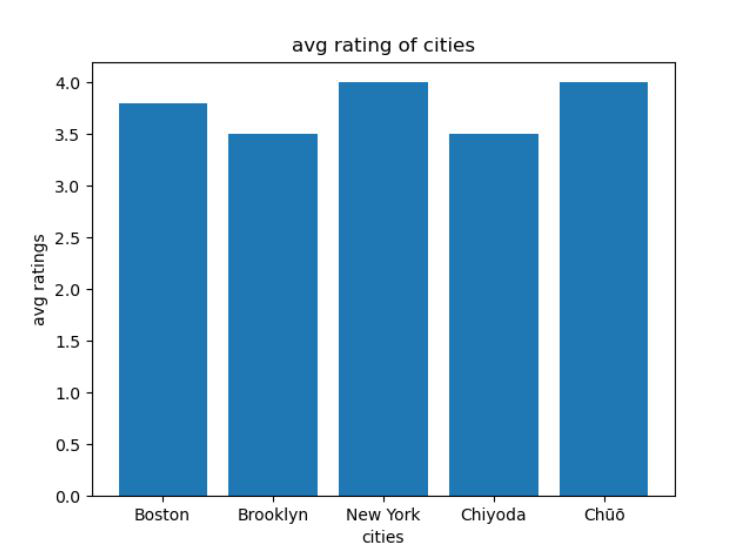

In [38]:
#run this to display graph
from PIL import Image
im = Image.open(r"visuals/avgdata.JPG") 
im.show() 

Overall we found that the best possible cities to get fast food are New York City and Chuo. Given the shortness and the popularity of the list of cities we used (['Boston','New York','Tokyo']) it makes sense that the average ratings are all above 3 or higher. We believe the rates to be so high because of rating bias. We choose a bunch of popular cities in fairly wealthy locations. It makes logical sense that due to the area's higher tourism/population and higher wealth, customers would be more happy with food obtained from these fast food businesses. Perhaps if a different, less well known, or less popular city was used the ratings would be less biased and we would see more change in average ratings.
 
In our journey to plot which cities have the highest average rating we encountered the limitations of the yelp API. The graph above titled "avg rating of cities' ' displays New York City and Brooklyn as two separate cities however Brooklyn is actually a borough in New York City. Because of this error the average rating of New York fast food has been affected. If Brooklyn was part of New York city like it is in real life the average rating for New York would have been lower. Overall we can say that the city of Chuo in Japan has the best fast food out of the list of places we used.

# Conclusions:
 
Honestly the most difficult part of this entire project was pivoting. We were very stuck on using the original APIMedic API and it took way too long for us to finally pivot into a more feasible project. On top of that we had to re-assess the scope of our new project and what work we could do with an even more limited time frame. Working with the data and creating new functions under that time constraint was extremely hard however it was also a great learning experience. We both noticed that as we wrote functions the overall time it took to test, and make sure the functions worked was decreased. It is clear from completing this project that our knowledge of how to use python has definitely been expanded.
 
While completing this project we stumbled upon many different ethical and contextual, and societal implications of using the yelp API that were not apparent at first glance. After the pivot our first idea for using the Yelp API was to find popular franchises, analyze the reviews and ratings, then analyze the area's demographic/rate of poverty. While it was an interesting concept to incorporate how the United states intentionally places certain demographics in areas and then builds fast food places around them (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4783380/), we were quickly informed that it was not a great idea. While we were puzzled for a second we reflected and agreed that it was not the best idea. If we did proceed with that project our data would essentially be saying that one franchise is statistically doing better than the others because a certain demographic is surrounding it. This would not only reinforce negative stereotypes about certain groups but it could also lead to people using our data to "prove" one group is somehow better or worse than the others. Overall it was very enlightening to learn about the impact of our code and the ethical, contextual, and societal implications it could have.

